#                            Heart Disease Diagnostic Analysis

# Importing Required Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

## Importing the dataset

In [70]:
df=pd.read_csv('Heart_Disease_data.csv')

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [72]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [73]:
#Checking Not null values
df.info()

# We can see that majority of the variables are of int64 type and are non-null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [74]:
df.shape

(1025, 14)

In [75]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [76]:
# Checking for missing values in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploratory Data Analysis

In [77]:
# Display the distribution of categorical features

print(df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']].value_counts())

sex  cp  fbs  restecg  exang  slope  ca  thal  target
1    1   0    1        0      2      0   2     1         30
     2   0    1        0      2      0   2     1         24
     0   0    1        1      1      1   3     0         22
0    2   0    1        0      1      0   2     1         19
     1   0    1        0      2      0   2     1         16
                                                         ..
     2   0    0        1      0      0   2     1          3
                              2      0   2     1          3
              1        0      1      1   2     1          3
                              2      0   3     1          3
1    3   1    1        0      1      0   3     1          3
Length: 201, dtype: int64


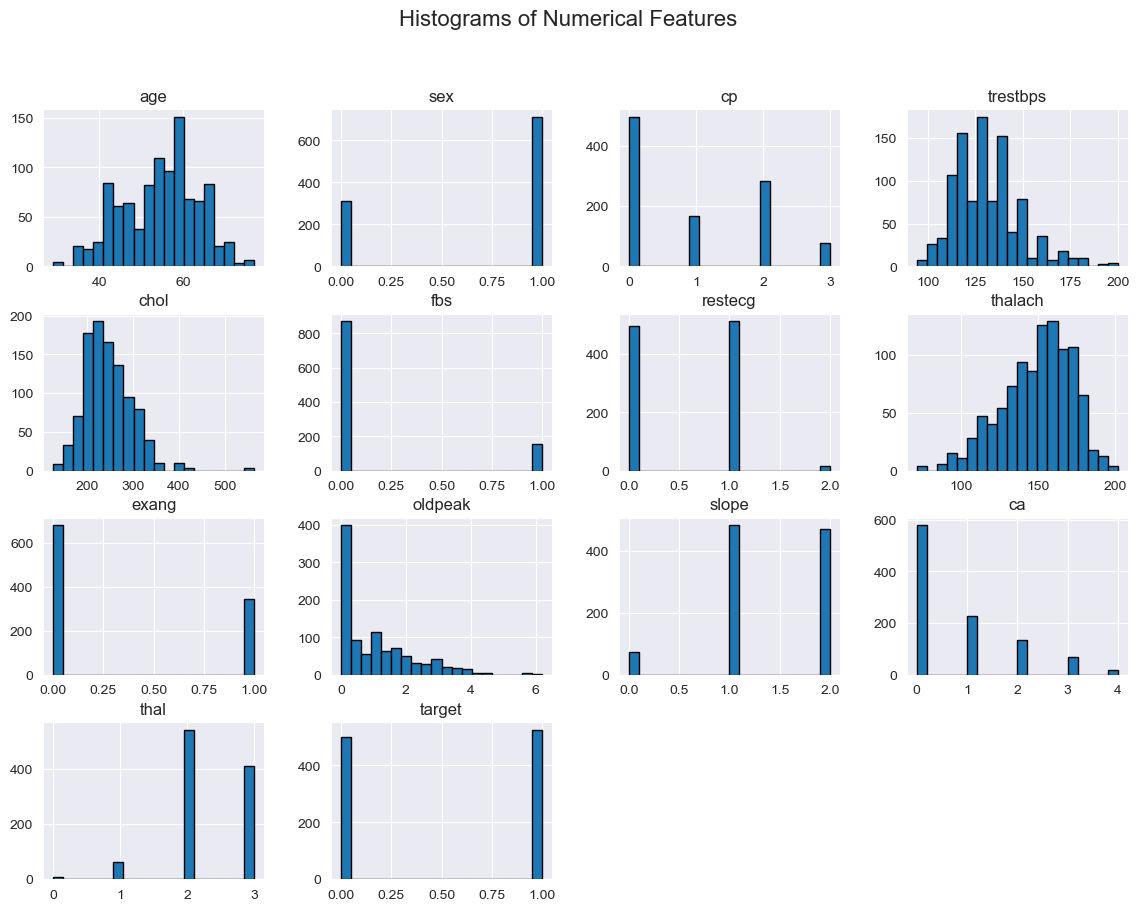

In [78]:
# Plot histograms for numerical features
df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

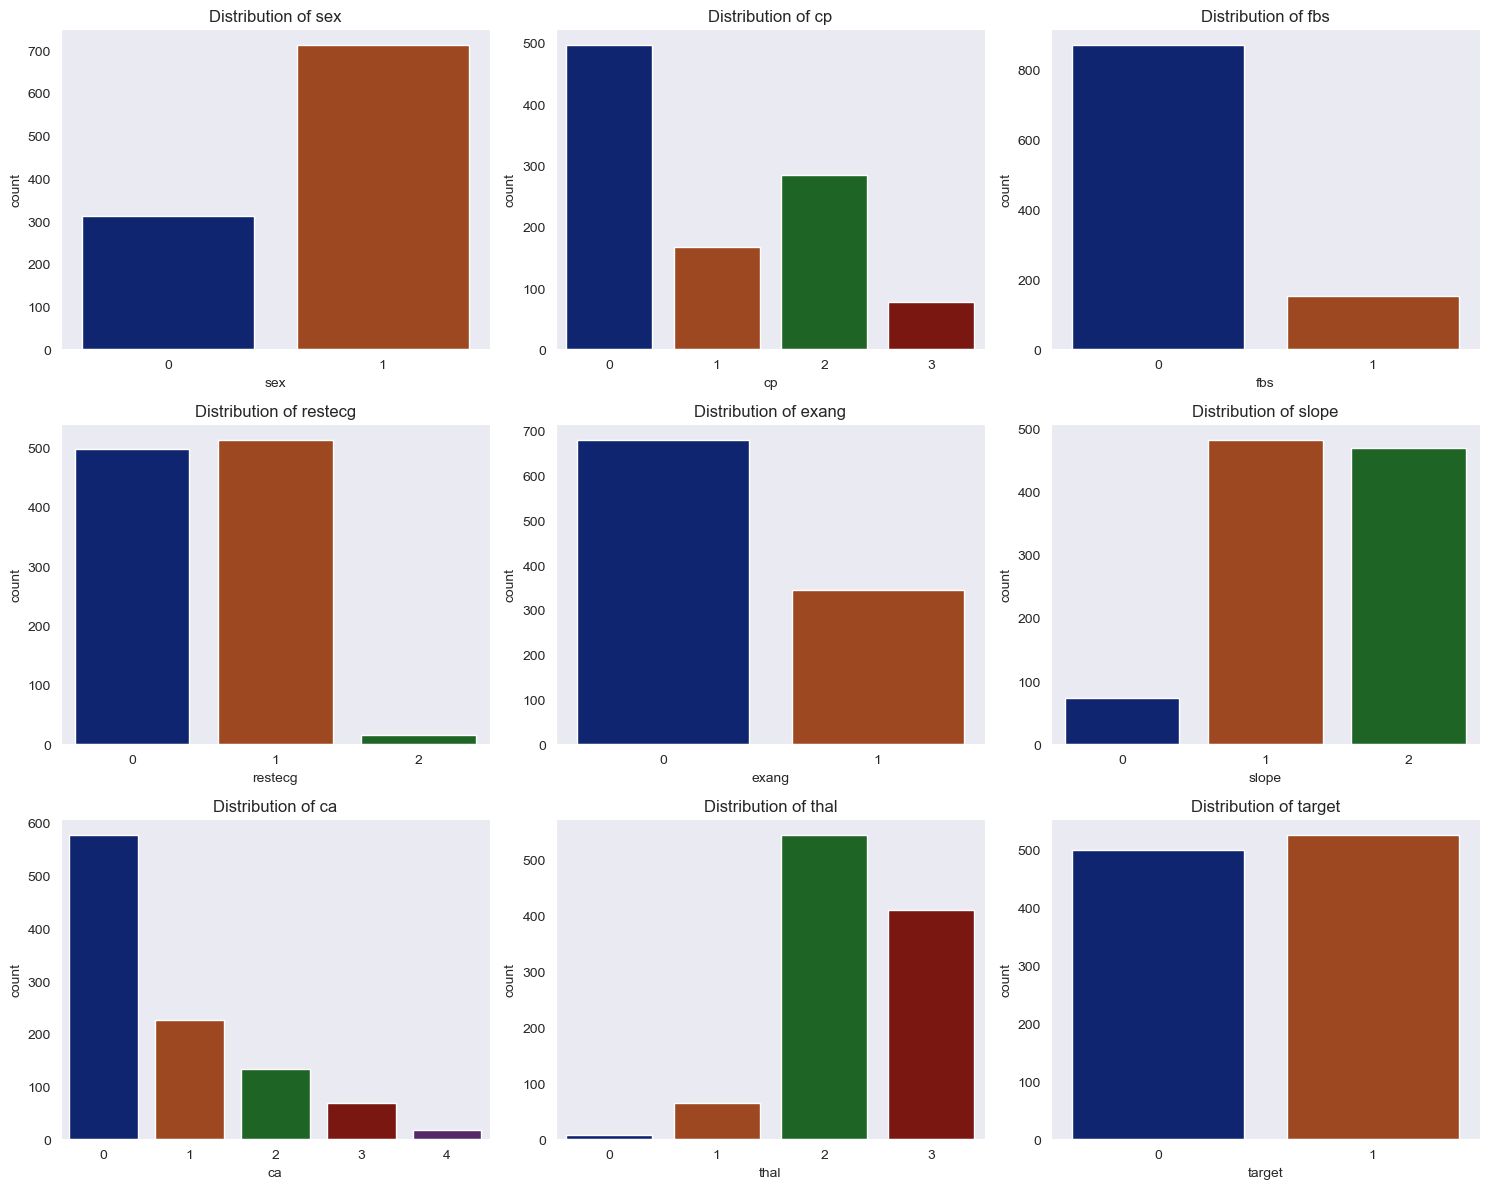

In [79]:
# Plot bar plots for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
plt.figure(figsize=(15, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=feature, palette='dark')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

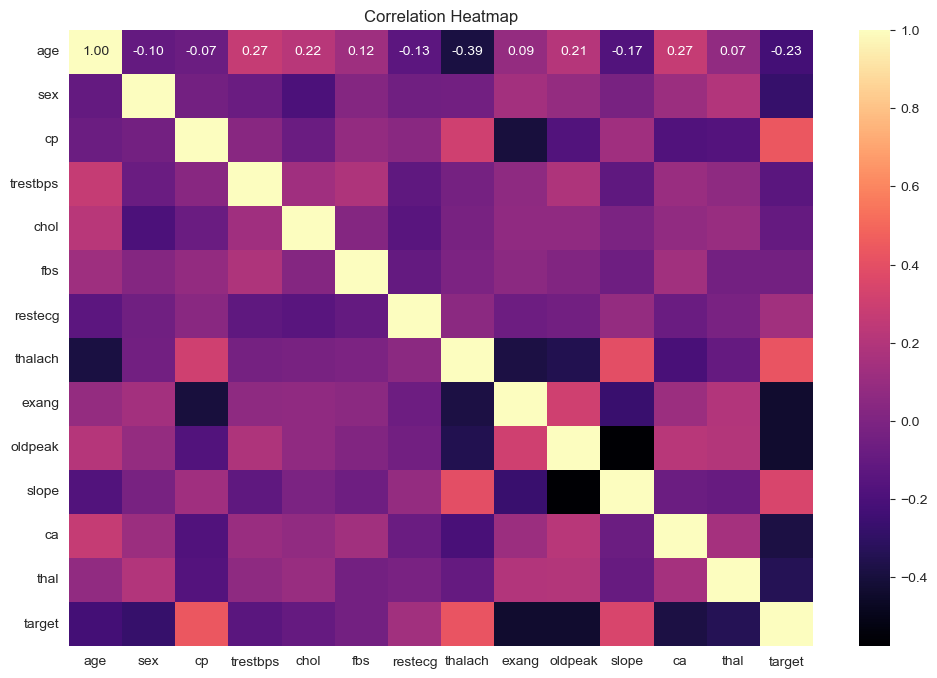

In [137]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#  Data Transformation

In [81]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [82]:
# Handle placeholder values and fill missing values

In [83]:
# Calculate median for 'ca' and 'thal' columns
ca_median = int(df['ca'].median())
thal_median = int(df['thal'].median())

In [84]:
# Replace -100000 with NaN for 'ca' and 'thal'
df.loc[df['ca'] == -100000, 'ca'] = np.nan
df.loc[df['thal'] == -100000, 'thal'] = np.nan

In [85]:
# Fill NaN values with the median
df['ca'].fillna(ca_median, inplace=True)
df['thal'].fillna(thal_median, inplace=True)

In [86]:
# Verify changes
print("Updated 'ca' column:")
print(df['ca'].unique())

Updated 'ca' column:
[2. 0. 1. 3. 4.]


In [87]:
print("Updated 'thal' column:")
print(df['thal'].unique())

Updated 'thal' column:
[3. 2. 1. 0.]


In [88]:
# Encoding categorical variables

In [89]:
label_encoder = LabelEncoder()

In [90]:
# Encode 'cp' (chest pain type), 'restecg' (resting electrocardiographic results), 'exang' (exercise induced angina),
# 'slope' (slope of peak exercise ST segment), 'ca' (number of major vessels colored by fluoroscopy), 'thal' (thalassemia)
df['cp'] = label_encoder.fit_transform(df['cp'])
df['restecg'] = label_encoder.fit_transform(df['restecg'])
df['exang'] = label_encoder.fit_transform(df['exang'])
df['slope'] = label_encoder.fit_transform(df['slope'])
df['ca'] = label_encoder.fit_transform(df['ca'])
df['thal'] = label_encoder.fit_transform(df['thal'])

In [91]:
# Verify encoding
print("\nEncoded categorical features:")
print(df[['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']].head())


Encoded categorical features:
   sex  cp  restecg  exang  slope  ca  thal
0    1   0        1      0      2   2     3
1    1   0        0      1      0   0     3
2    1   0        1      1      0   0     3
3    1   0        1      0      2   1     3
4    0   0        1      0      1   3     2


## Exporting the Preprocessed dataset

In [92]:
df.to_csv('preprocessed_heart_disease_dataset.csv',index = False)

In [93]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Analysis

In [95]:
data = pd.read_csv('preprocessed_heart_disease_dataset.csv')

In [96]:
def heart_disease(row):
    return "No Heart Disease" if row == 0 else "Heart Disease"

data['Heart_Disease'] = data['target'].apply(heart_disease)

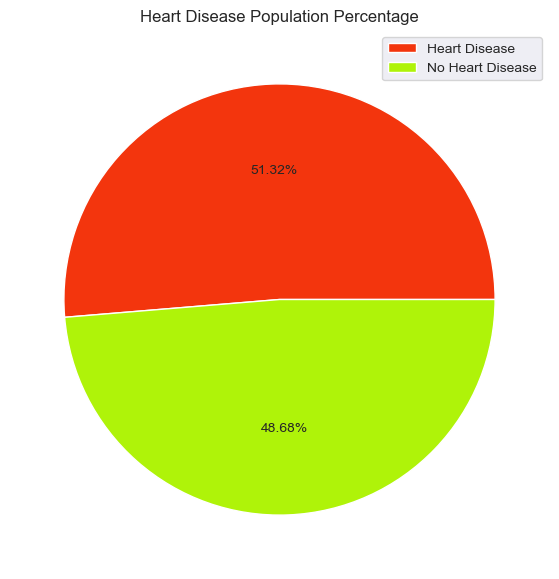

In [98]:
# Pie chart for Heart Disease Population
plt.figure(figsize=(10, 7))
count_ap = data.groupby('Heart_Disease')['target'].count()
plt.pie(count_ap, autopct="%.2f%%", colors=['#f3350d', '#aff309'])
plt.title("Heart Disease Population Percentage")
plt.legend(["Heart Disease", "No Heart Disease"])
plt.show()

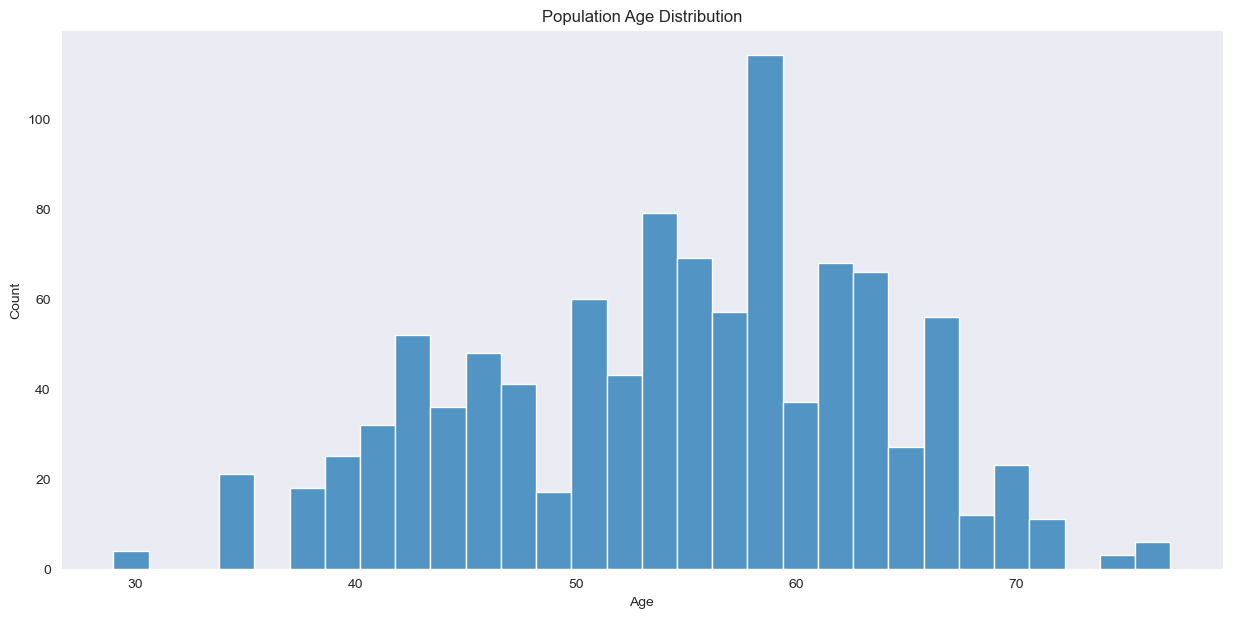

In [101]:
# Age Distribution
plt.figure(figsize=(15, 7))
sns.histplot(data['age'], kde=False, bins=30)
plt.title("Population Age Distribution")
plt.ylabel("Count")
plt.xlabel('Age')
plt.show()

In [102]:
# Age statistics
Max_age = data['age'].max()
Min_age = data['age'].min()
Mean_age = data['age'].mean()
print(f"Maximum Age affected by Heart Disease: {Max_age}")
print(f"Minimum Age affected by Heart Disease: {Min_age}")
print(f"Mean Age: {Mean_age}")

Maximum Age affected by Heart Disease: 77
Minimum Age affected by Heart Disease: 29
Mean Age: 54.43414634146342


In [103]:
# Age Categories
young_age = data[(data['age'] >= 29) & (data['age'] < 40)]
middle_age = data[(data['age'] >= 40) & (data['age'] < 55)]
elder_age = data[data['age'] > 55]
print(f"Heart Disease affected by Young age: {len(young_age)}")
print(f"Heart Disease affected by Middle age: {len(middle_age)}")
print(f"Heart Disease affected by Elder age: {len(elder_age)}")

Heart Disease affected by Young age: 57
Heart Disease affected by Middle age: 419
Heart Disease affected by Elder age: 519


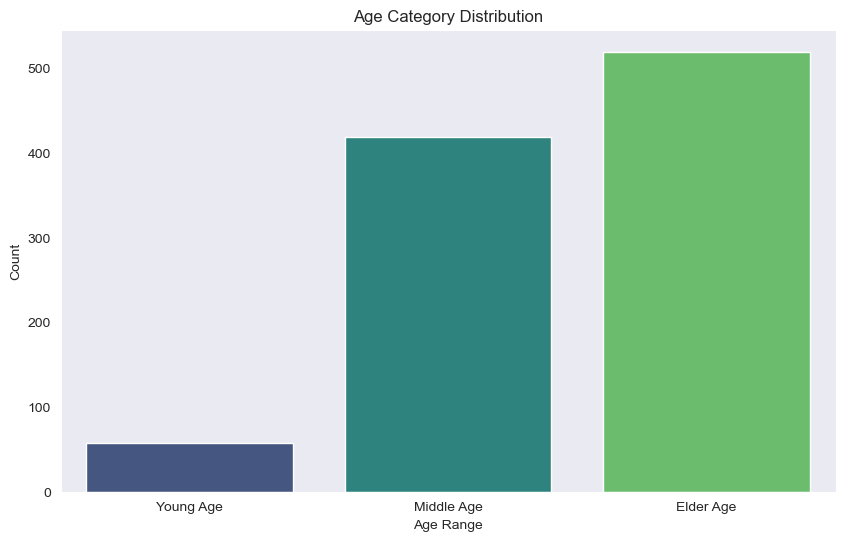

In [104]:
# Age Category Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=['Young Age', 'Middle Age', 'Elder Age'], y=[len(young_age), len(middle_age), len(elder_age)], palette='viridis')
plt.title("Age Category Distribution")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()

In [105]:
# Gender Column
def gender(row):
    return 'Male' if row == 1 else 'Female'

data['gender'] = data['sex'].apply(gender)

In [107]:
# Age Range Column
def age_range(row):
    if 29 <= row < 40:
        return 'Young Age'
    elif 40 <= row < 55:
        return 'Middle Age'
    elif row > 55:
        return 'Elder Age'

data['Age_Range'] = data['age'].apply(age_range)

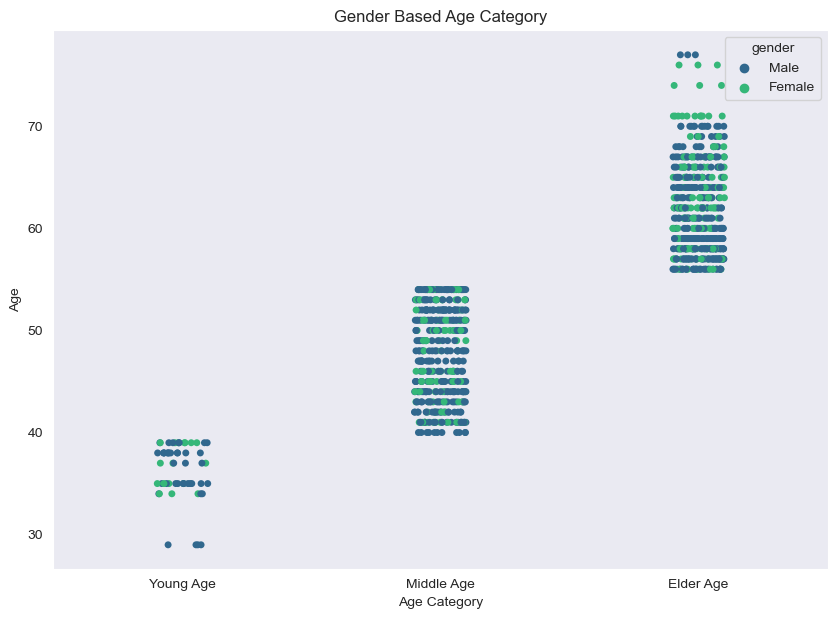

In [112]:
# Age vs Gender
plt.figure(figsize=(10, 7))
sns.stripplot(x='Age_Range', y='age', hue='gender', data=data, 
              order=['Young Age', 'Middle Age', 'Elder Age'], 
              palette='viridis', jitter=True)  # Enable jitter to handle overlap
plt.title('Gender Based Age Category')
plt.xlabel('Age Category')
plt.ylabel('Age')
plt.show()


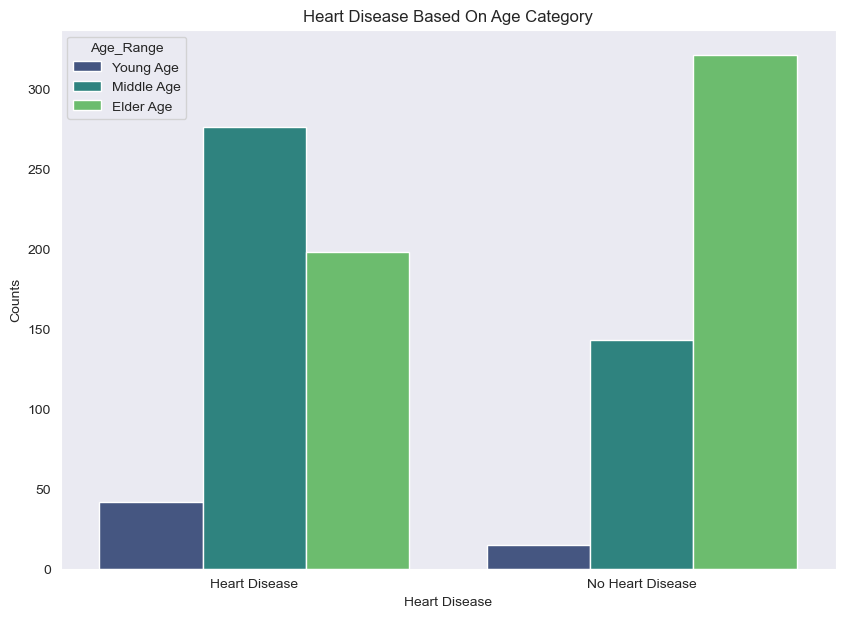

In [114]:
# Heart Disease vs Age Range
plt.figure(figsize=(10, 7))
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Heart Disease', 'No Heart Disease'], hue_order=['Young Age', 'Middle Age', 'Elder Age'], palette='viridis')
plt.title('Heart Disease Based On Age Category')
plt.xlabel('Heart Disease')
plt.ylabel('Counts')
plt.show()

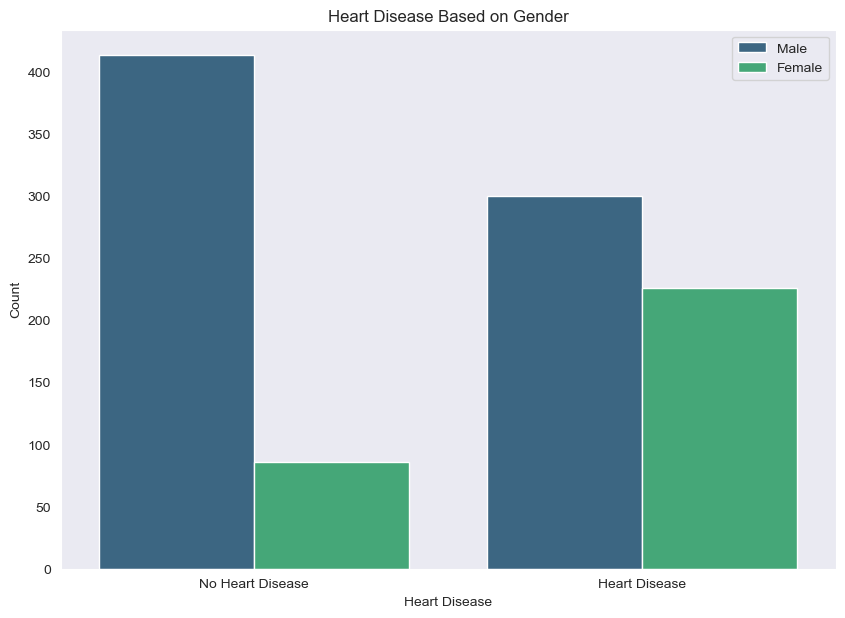

In [116]:
# Heart Disease vs Gender
plt.figure(figsize=(10, 7))
sns.countplot(x='Heart_Disease', hue='gender', data=data, palette='viridis')
plt.title('Heart Disease Based on Gender')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(labels=['Male', 'Female'])
plt.show()

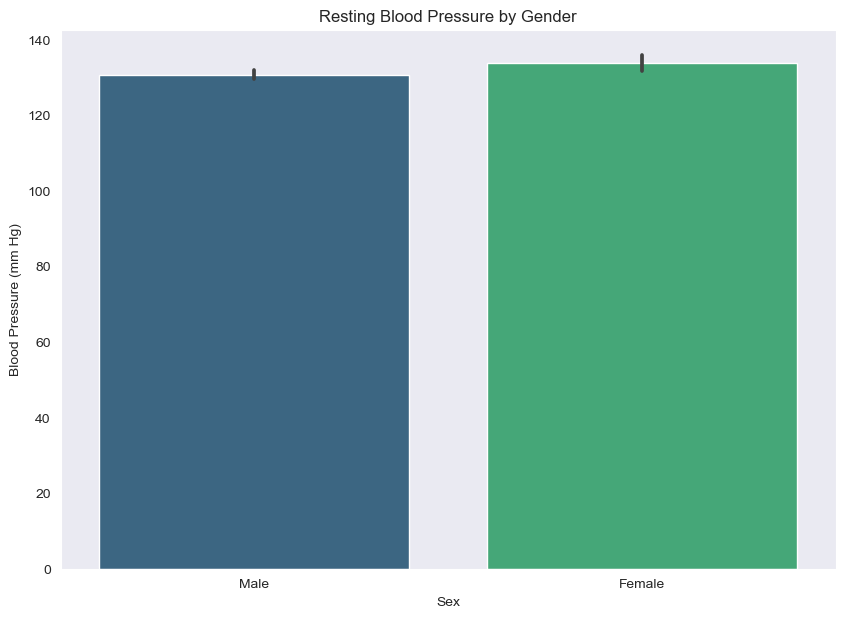

In [121]:
# Blood Pressure by Gender
plt.figure(figsize=(10, 7))
sns.barplot(x='gender', y='trestbps', data=data, palette='viridis')
plt.title("Resting Blood Pressure by Gender")
plt.xlabel('Sex')
plt.ylabel("Blood Pressure (mm Hg)")
plt.show()

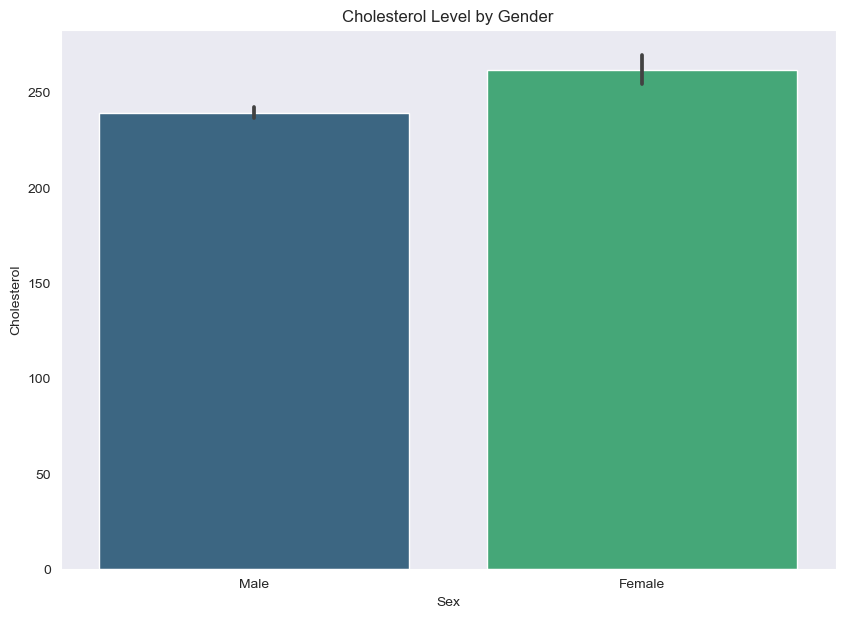

In [123]:
# Cholesterol Level by Gender
plt.figure(figsize=(10, 7))
sns.barplot(x='gender', y='chol', data=data, palette='viridis')
plt.title("Cholesterol Level by Gender")
plt.xlabel('Sex')
plt.ylabel("Cholesterol")
plt.show()

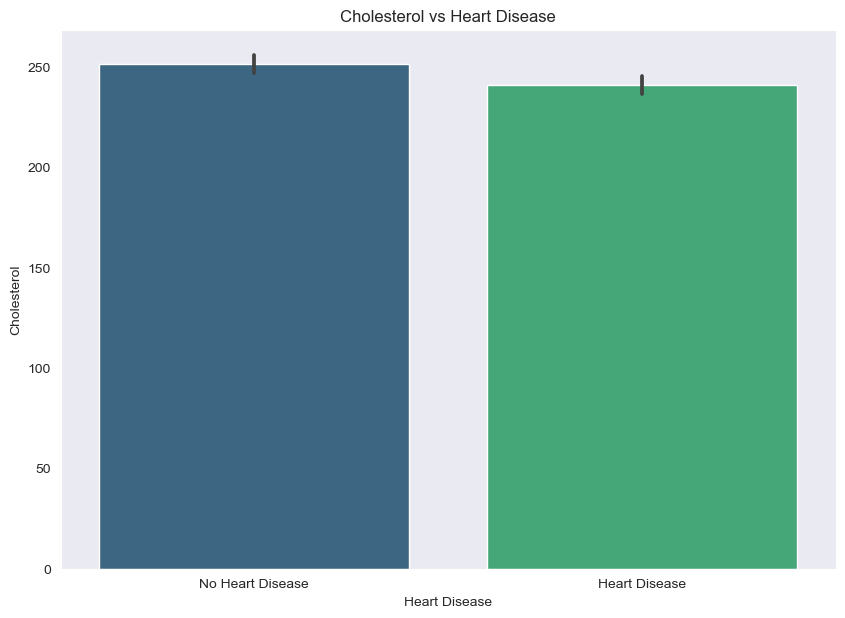

In [124]:
# Cholesterol vs Heart Disease
plt.figure(figsize=(10, 7))
sns.barplot(x='Heart_Disease', y='chol', data=data, palette='viridis')
plt.title('Cholesterol vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

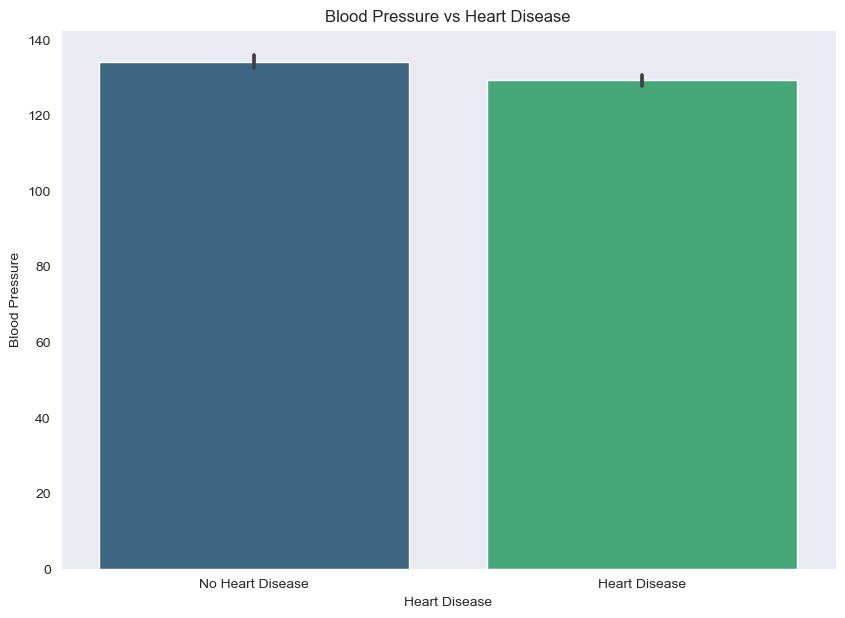

In [125]:
# Blood Pressure vs Heart Disease
plt.figure(figsize=(10, 7))
sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='viridis')
plt.title('Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Blood Pressure')
plt.show()

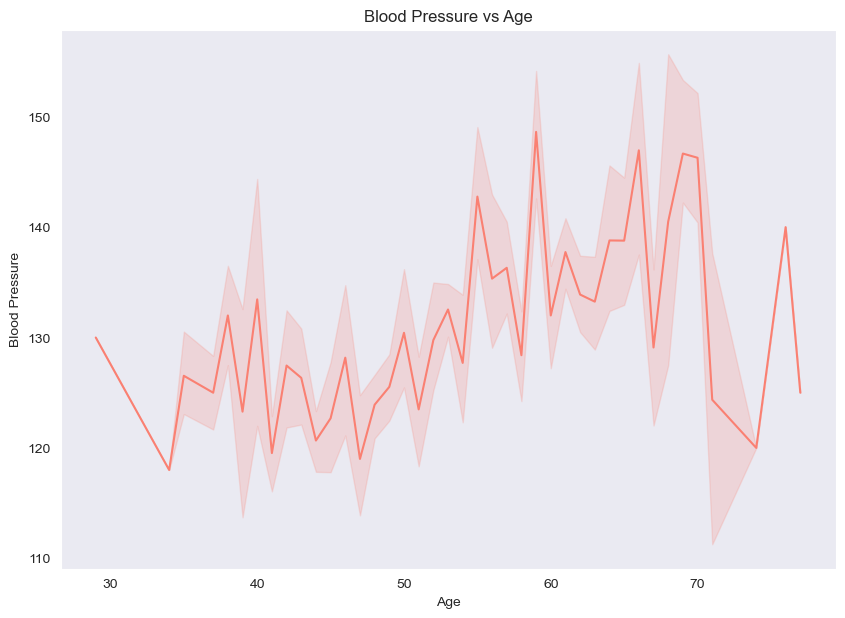

In [127]:
# Lineplot for Blood Pressure vs Age
plt.figure(figsize=(10, 7))
sns.lineplot(x='age', y='trestbps', data=data, color='salmon')
plt.title('Blood Pressure vs Age')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

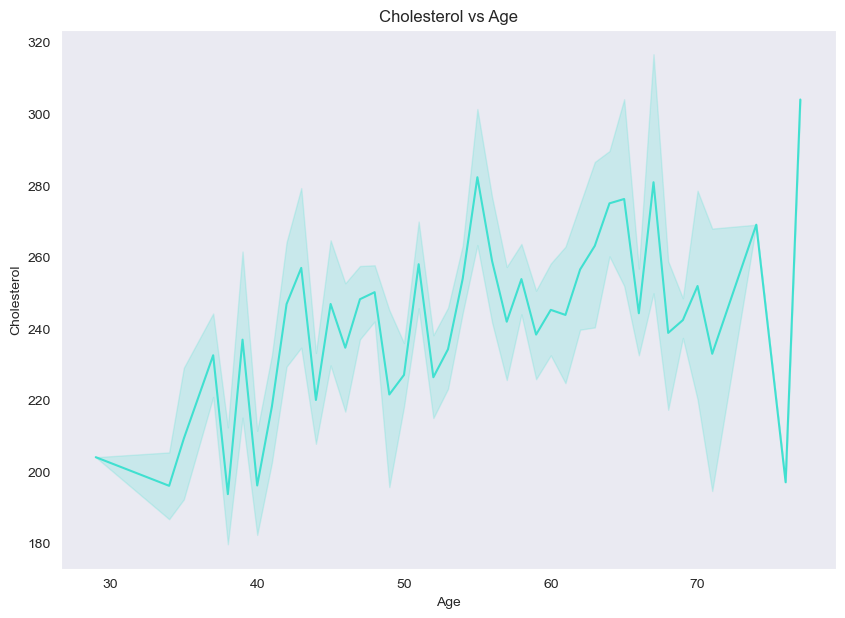

In [129]:
# Lineplot for Cholesterol vs Age
plt.figure(figsize=(10, 7))
sns.lineplot(x='age', y='chol', data=data, color='turquoise')
plt.title('Cholesterol vs Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

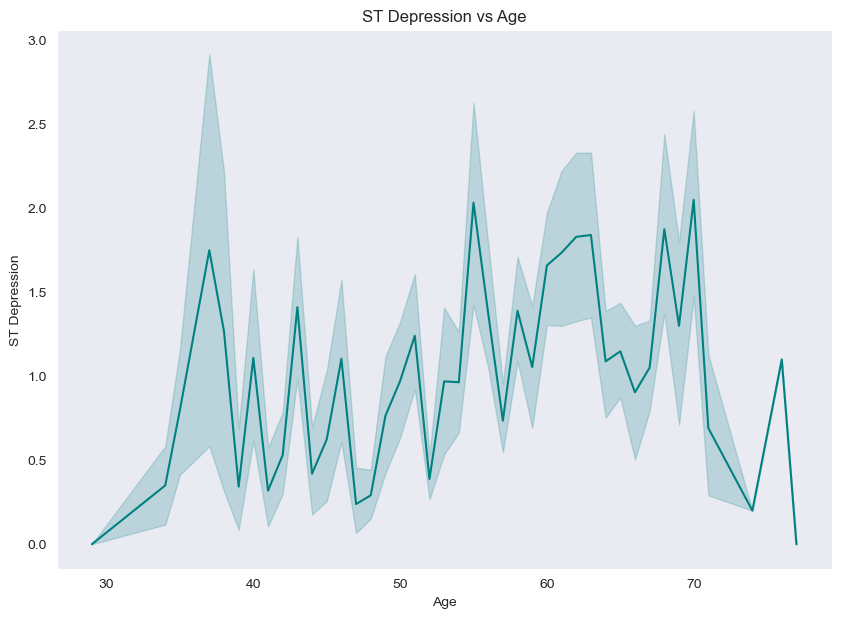

In [130]:
# Lineplot for ST Depression vs Age
plt.figure(figsize=(10, 7))
sns.lineplot(x='age', y='oldpeak', data=data, color='teal')
plt.title('ST Depression vs Age')
plt.xlabel('Age')
plt.ylabel('ST Depression')
plt.show()

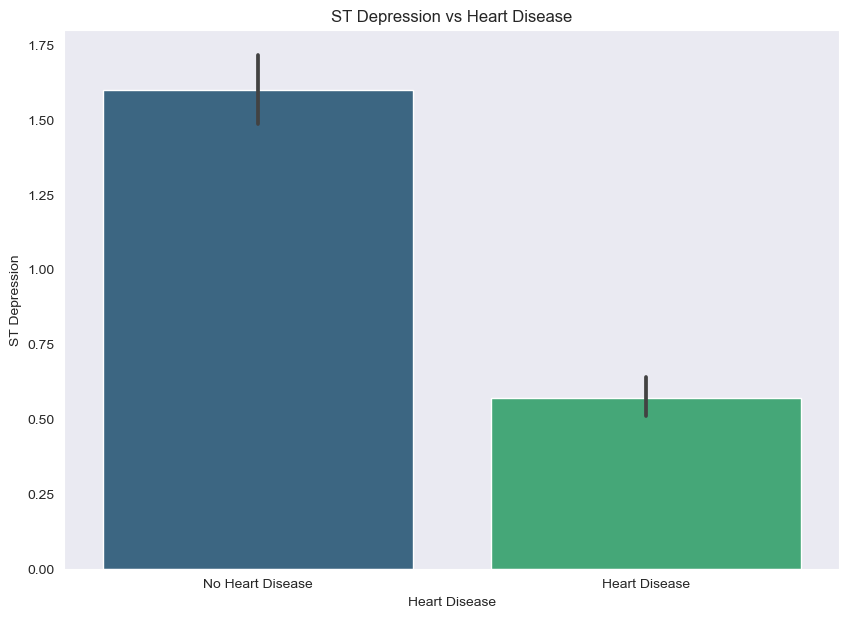

In [131]:
# ST Depression vs Heart Disease
plt.figure(figsize=(10, 7))
sns.barplot(x='Heart_Disease', y='oldpeak', data=data, palette='viridis')
plt.title('ST Depression vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('ST Depression')
plt.show()

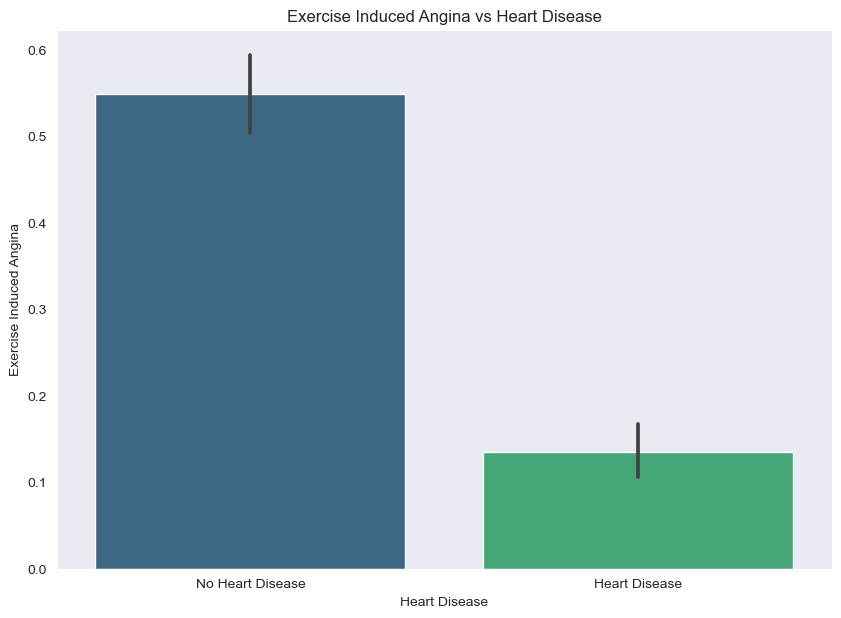

In [132]:
# Exercise Induced Angina vs Heart Disease
plt.figure(figsize=(10, 7))
sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')
plt.title('Exercise Induced Angina vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Exercise Induced Angina')
plt.show()

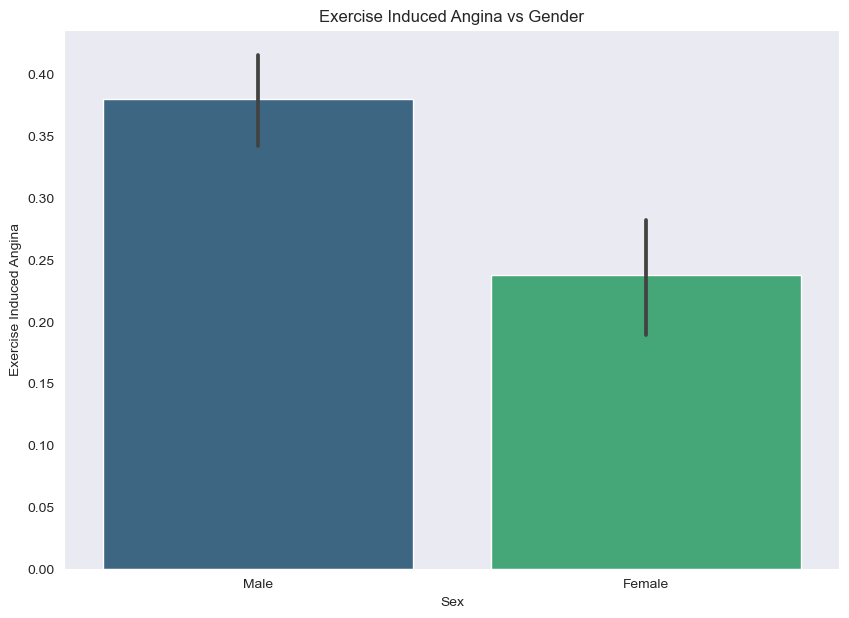

In [133]:
# Exercise Induced Angina vs Gender
plt.figure(figsize=(10, 7))
sns.barplot(x='gender', y='exang', data=data, palette='viridis')
plt.title('Exercise Induced Angina vs Gender')
plt.xlabel('Sex')
plt.ylabel('Exercise Induced Angina')
plt.show()

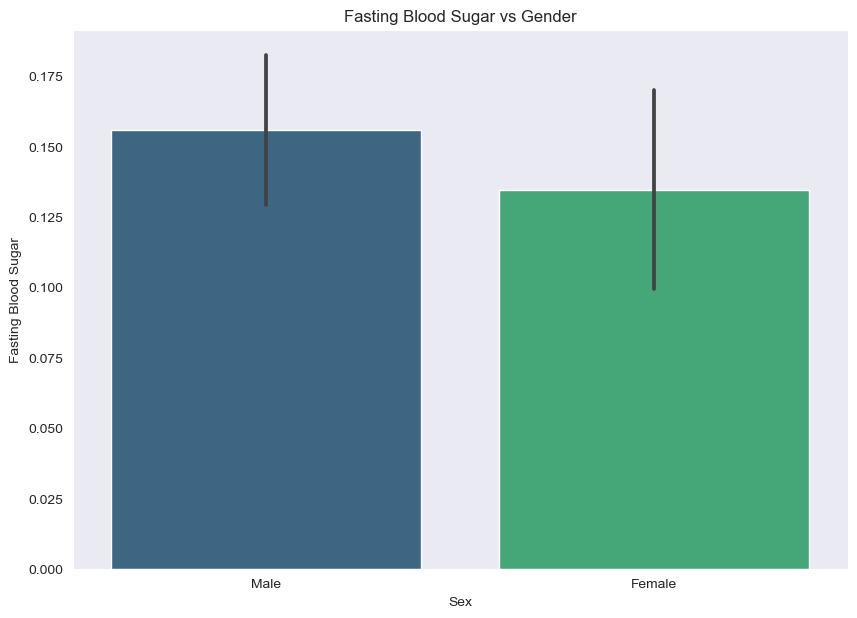

In [134]:
# Fasting Blood Sugar vs Gender
plt.figure(figsize=(10, 7))
sns.barplot(x='gender', y='fbs', data=data, palette='viridis')
plt.title('Fasting Blood Sugar vs Gender')
plt.xlabel('Sex')
plt.ylabel('Fasting Blood Sugar')
plt.show()

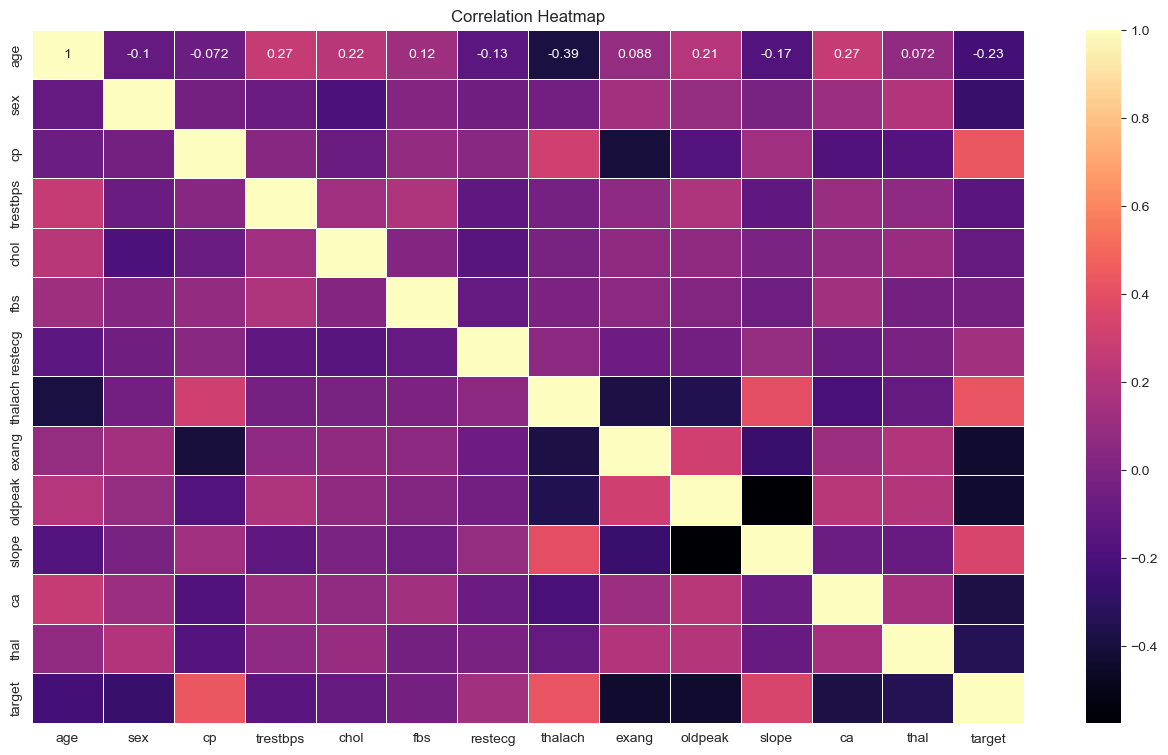

In [136]:
# Heatmap of Correlations
plt.figure(figsize=(16, 9))
sns.heatmap(data.corr(), annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### With our diagnostic and exploratory analysis complete, we now have a deeper understanding of the dataset and can gain effective insights. 
## Analysis by M Shubhakar